Lista 6

Zadanie 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [22]:
n = 10000
phi = 0.2
sigma = np.sqrt(0.4)

In [4]:
def ma1_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [5]:
def generate_ar1(n, sigma, phi):
    z = np.random.normal(0, sigma, n)
    x = np.zeros(n)
    for i in range(1, n):
        x[i] = x[i-1] * phi + z[i]
    return x

In [6]:
def autokowariancja(h, x):
    n = len(x)
    mean_x = np.mean(x)
    return 1/n * np.sum((x[:n-abs(h)] - mean_x) * (x[abs(h):] - mean_x))

In [7]:
def autokorelacja(h, x):
    return autokowariancja(h, x) / autokowariancja(0,x)

In [23]:
sample = generate_ar1(n, sigma, phi)

In [16]:
def ar1_acvf(phi, sigma, h):
    return sigma**2 * phi ** (abs(h)) / (1 - phi**2)

In [17]:
def ar1_acf(phi,h):
    return phi**(abs(h))

In [28]:
hs = np.arange(0,51,1)

In [29]:
autokow_emp,autokow_teo = [], []
autokor_emp, autokor_teo = [], []
for h in hs:
    autokow_emp.append(autokowariancja(h, sample))
    autokow_teo.append(ar1_acvf(phi, sigma, h))
    autokor_emp.append(autokorelacja(h, sample))
    autokor_teo.append(ar1_acf(phi, h))

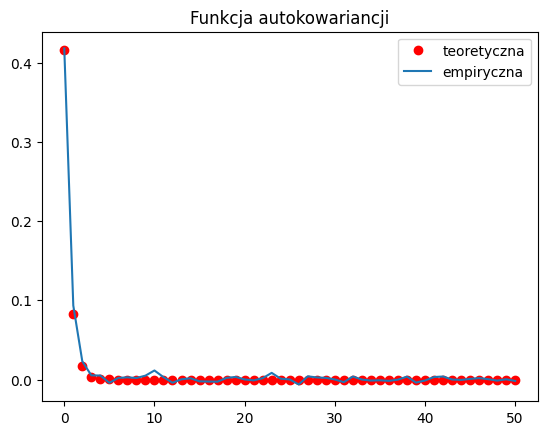

In [30]:
plt.plot(hs, autokow_teo, "ro", label="teoretyczna")
plt.plot(hs, autokow_emp, label="empiryczna")
plt.title("Funkcja autokowariancji")
plt.legend(loc="best")
plt.show()

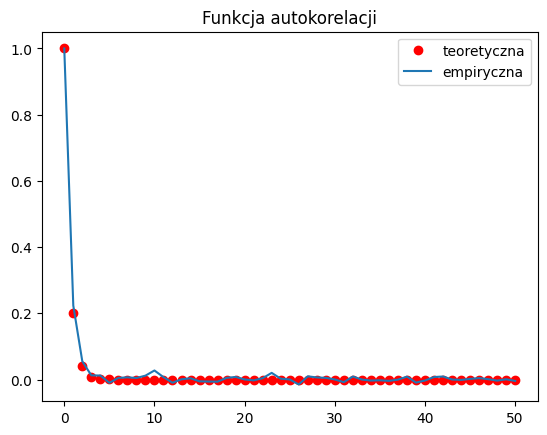

In [31]:
plt.plot(hs, autokor_teo, "ro", label="teoretyczna")
plt.plot(hs, autokor_emp, label="empiryczna")
plt.title("Funkcja autokorelacji")
plt.legend(loc="best")
plt.show()

Zadanie 2

In [55]:
mc = 100
alpha = 5

In [68]:
autokow_mc, autokor_mc = [], []
for _ in range(mc):
    autokow_emp,autokor_emp = [], []
    sample = generate_ar1(n, sigma, phi)
    for h in hs:
        autokow_emp.append(autokowariancja(h, sample))
        autokor_emp.append(autokorelacja(h, sample))
    autokor_mc.append(autokor_emp)
    autokow_mc.append(autokow_emp)

autokow_teo = [ar1_acvf(phi,sigma,h) for h in hs]
autokor_teo = [ar1_acf(phi, h) for h in hs]
    

In [69]:
lower_acvf = np.percentile(autokow_mc, alpha, axis=0)
upper_acvf = np.percentile(autokow_mc, 100-alpha, axis=0)
mean_acvf = np.mean(autokow_mc, axis=0)
lower_acf = np.percentile(autokor_mc, alpha, axis=0)
upper_acf = np.percentile(autokor_mc, 100-alpha, axis=0)
mean_acf = np.mean(autokor_mc, axis=0)

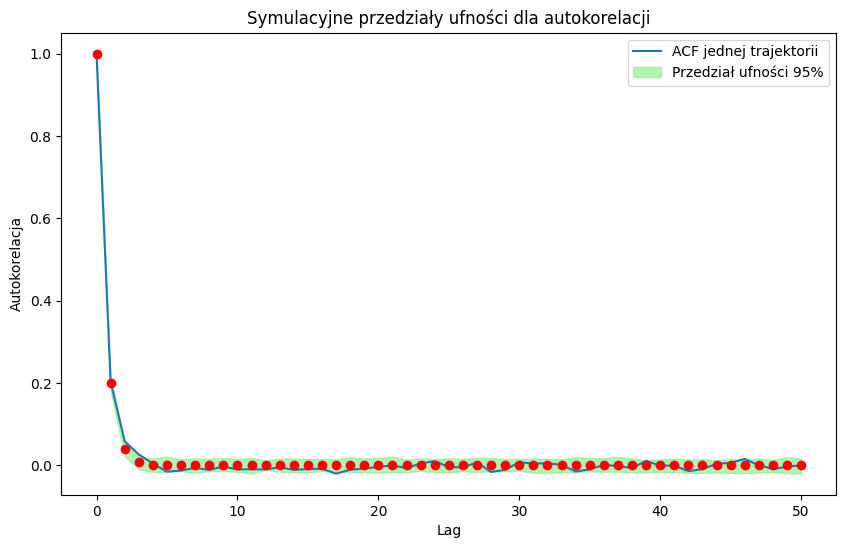

In [70]:
plt.figure(figsize=(10,6))
plt.plot(hs, autokor_mc[0], label="ACF jednej trajektorii")
plt.plot(hs, autokor_teo, "ro")
plt.fill_between(hs, lower_acf, upper_acf, color='lightgreen', alpha=0.7, label="Przedział ufności 95%")
plt.title("Symulacyjne przedziały ufności dla autokorelacji")
plt.xlabel("Lag")
plt.ylabel("Autokorelacja")
plt.legend()
plt.show()

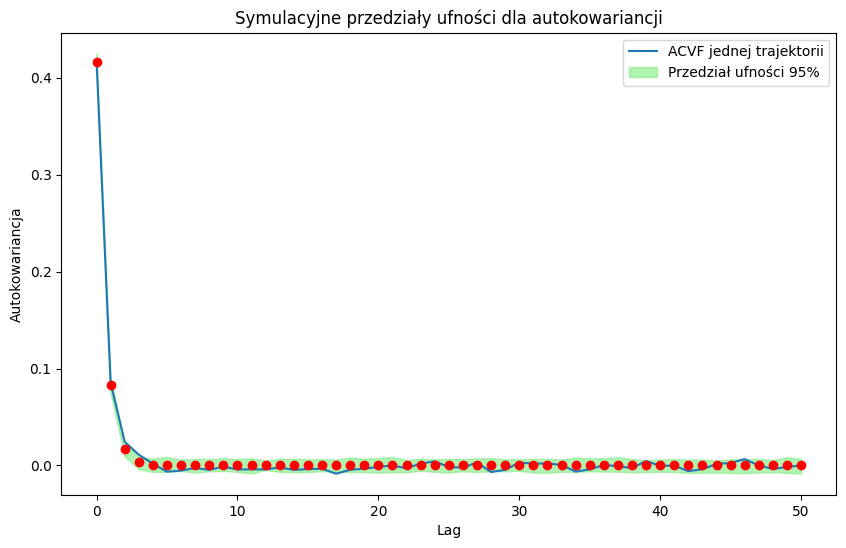

In [75]:
plt.figure(figsize=(10,6))
plt.plot(hs, autokow_mc[0], label="ACVF jednej trajektorii")
plt.plot(hs, autokow_teo, "ro")
plt.fill_between(hs, lower_acvf, upper_acvf, color='lightgreen', alpha=0.7, label="Przedział ufności 95%")
plt.title("Symulacyjne przedziały ufności dla autokowariancji")
plt.xlabel("Lag")
plt.ylabel("Autokowariancja")
plt.legend()
plt.show()